In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('../../data/df_analyse.csv')
df

Invoice  StockCode                          Description  Quantity  \
0        489434      85048  15CM_CHRISTMAS_GLASS_BALL_20_LIGHTS        12   
1        489434      22041          RECORD_FRAME_7"_SINGLE_SIZE        48   
2        489434      21232       STRAWBERRY_CERAMIC_TRINKET_BOX        24   
3        489434      22064            PINK_DOUGHNUT_TRINKET_POT        24   
4        489434      21871                  SAVE_THE_PLANET_MUG        24   
...         ...        ...                                  ...       ...   
713597   581587      22613          PACK_OF_20_SPACEBOY_NAPKINS        12   
713598   581587      22899          CHILDREN'S_APRON_DOLLY_GIRL         6   
713599   581587      23254         CHILDRENS_CUTLERY_DOLLY_GIRL         4   
713600   581587      23255      CHILDRENS_CUTLERY_CIRCUS_PARADE         4   
713601   581587      22138         BAKING_SET_9_PIECE_RETROSPOT         3   

                InvoiceDate  Price  Customer_ID         Country  
0       2009-12-01 07:45:00   6.95        13085  United_Kingdom  
1       2009-12-01 07:45:00   2.10        13085  United_Kingdom  
2       2009-12-01 07:45:00   1.25        13085  United_Kingdom  
3       2009-12-01 07:45:00   1.65        13085  United_Kingdom  
4       2009-12-01 07:45:00   1.25        13085  United_Kingdom  
...                     ...    ...          ...             ...  
713597  2011-12-09 12:50:00   0.85        12680          France  
713598  2011-12-09 12:50:00   2.10        12680          France  
713599  2011-12-09 12:50:00   4.15        12680          France  
713600  2011-12-09 12:50:00   4.15        12680          France  
713601  2011-12-09 12:50:00   4.95        12680          France  

[713602 rows x 8 columns]

In [93]:
df.describe()

Invoice      StockCode       Quantity          Price  \
count  713602.000000  713602.000000  713602.000000  713602.000000   
mean   538442.099013   28207.425398      13.412011       2.931811   
std     26488.049502   17715.696735     151.694734       4.393742   
min    489434.000000   10002.000000       1.000000       0.000000   
25%    516634.000000   21733.000000       2.000000       1.250000   
50%    537649.000000   22384.000000       6.000000       1.950000   
75%    562551.000000   22940.000000      12.000000       3.750000   
max    581587.000000   90208.000000   80995.000000     649.500000   

         Customer_ID  
count  713602.000000  
mean    15327.925330  
std      1695.645004  
min     12346.000000  
25%     13979.000000  
50%     15264.000000  
75%     16795.000000  
max     18287.000000

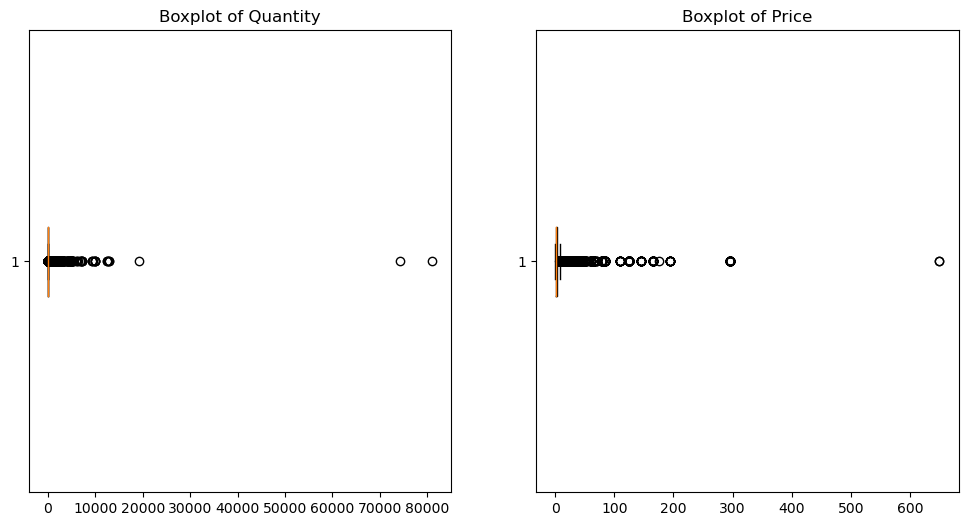

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].boxplot(df['Quantity'], vert=False)
ax[0].set_title('Boxplot of Quantity')

ax[1].boxplot(df['Price'], vert=False)
ax[1].set_title('Boxplot of Price')

plt.show()

In [95]:
# Remove outliers
df = df[df['Quantity'] < 152]
df = df[df['Price'] < 10]

# Checking the shape of the data after outlier removal
df.shape

(689178, 8)

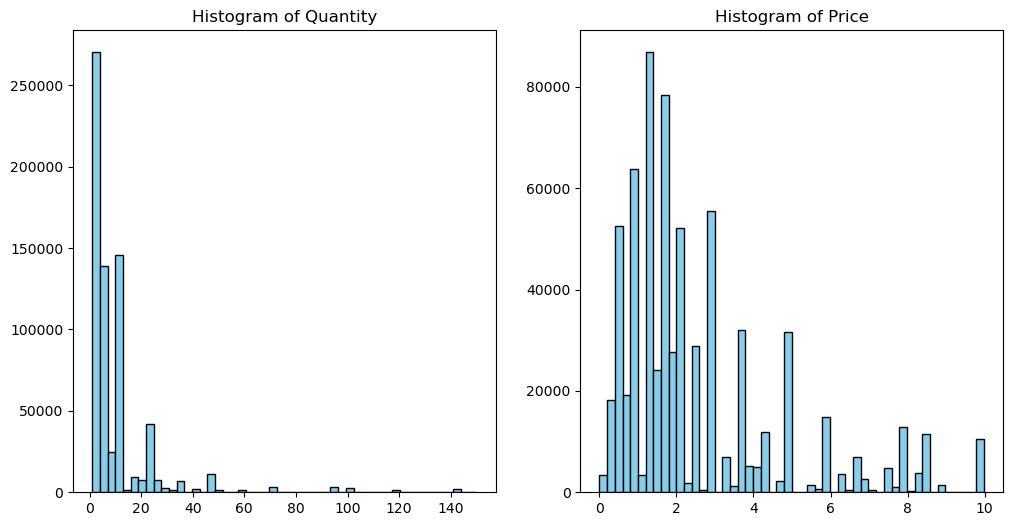

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist(df['Quantity'], bins=50, color='skyblue', edgecolor='black')
ax[0].set_title('Histogram of Quantity')

ax[1].hist(df['Price'], bins=50, color='skyblue', edgecolor='black')
ax[1].set_title('Histogram of Price')

plt.show()

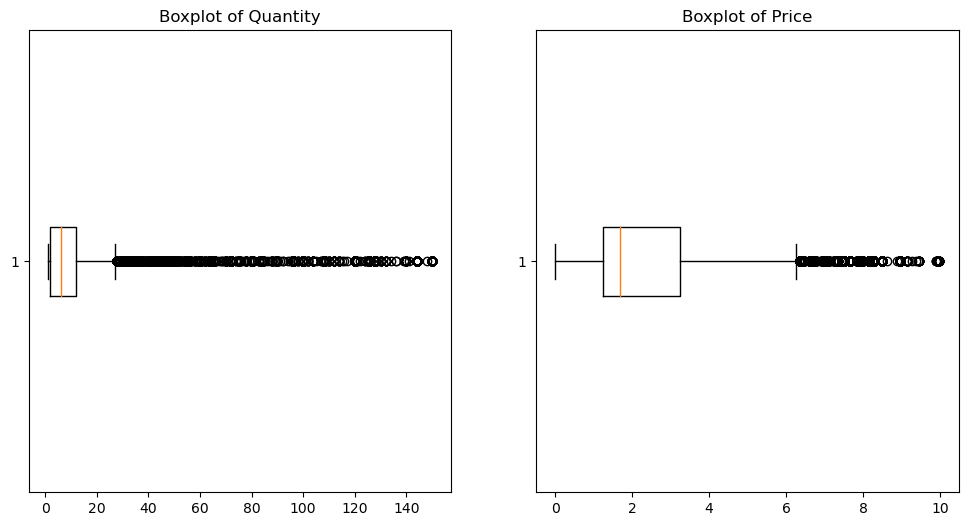

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].boxplot(df['Quantity'], vert=False)
ax[0].set_title('Boxplot of Quantity')

ax[1].boxplot(df['Price'], vert=False)
ax[1].set_title('Boxplot of Price')

plt.show()

/tmp/ipykernel_8331/1120932690.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_trend = df.groupby(df['InvoiceDate'].dt.to_period('M')).sum()['TotalSales']


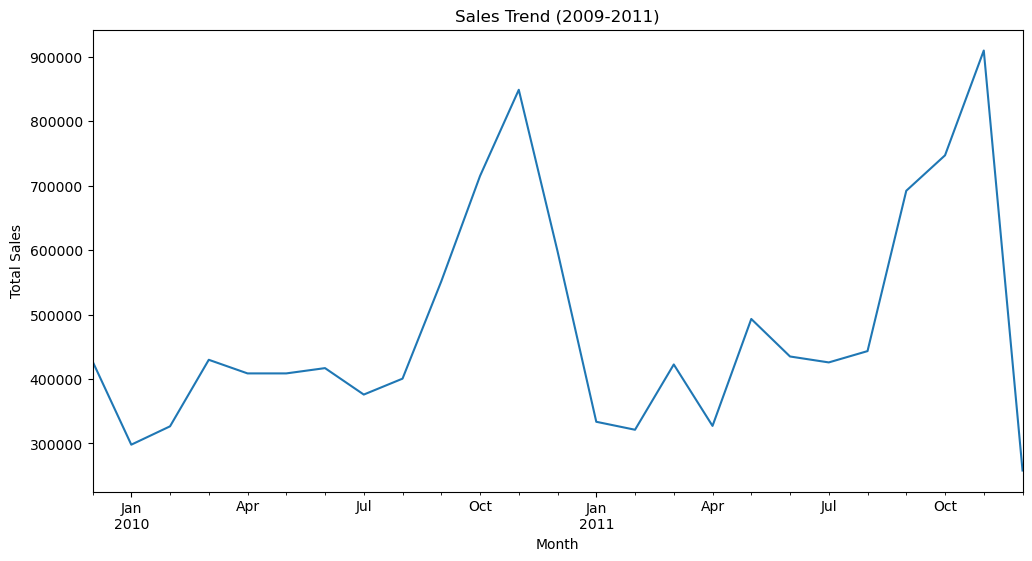

In [98]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new column for total sales
df['TotalSales'] = df['Quantity'] * df['Price']

# Group by month and calculate total sales
sales_trend = df.groupby(df['InvoiceDate'].dt.to_period('M')).sum()['TotalSales']

# Plot the sales trend
sales_trend.plot(kind='line', figsize=(12, 6))
plt.title('Sales Trend (2009-2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

/tmp/ipykernel_8331/2646797269.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_country = df.groupby('Country').sum()['TotalSales']


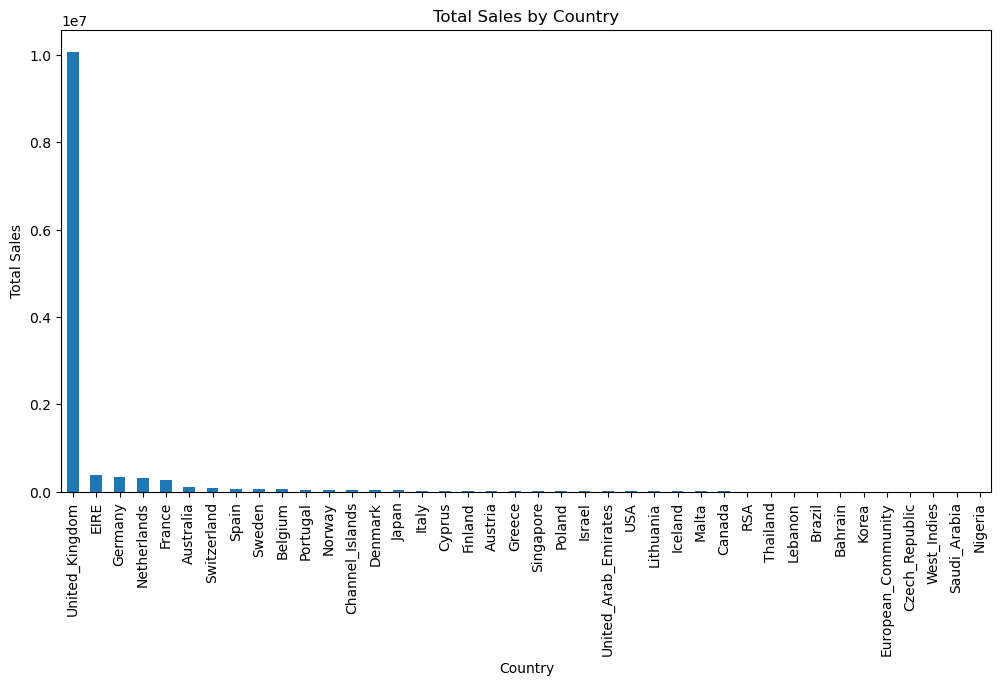

In [99]:
# total de vente par total sale par pays graphique a barre

# Group by country and calculate total sales
sales_country = df.groupby('Country').sum()['TotalSales']

# Plot the total sales by country
sales_country.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

/tmp/ipykernel_8331/3520357075.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_country = df.groupby('Country').sum()['TotalSales']
/tmp/ipykernel_8331/3520357075.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


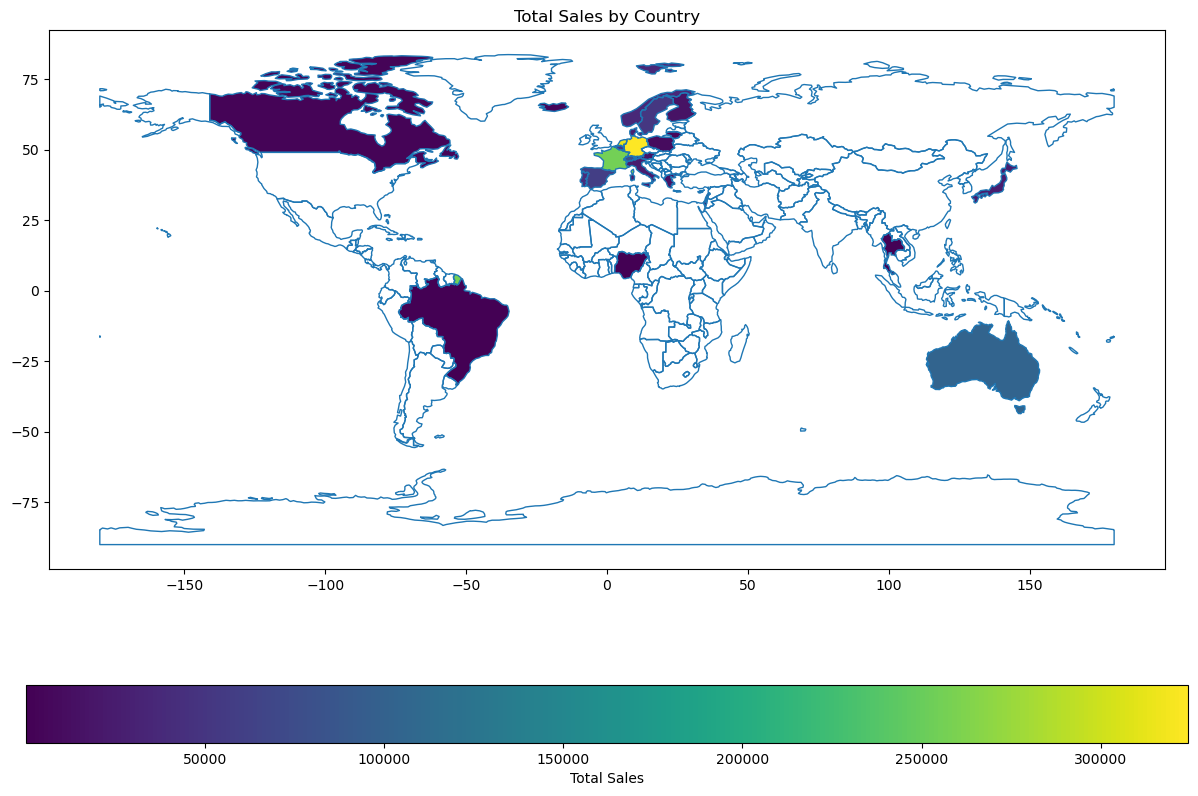

In [100]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Group the data by country and calculate total sales
sales_by_country = df.groupby('Country').sum()['TotalSales']

# Load a GeoDataFrame with the geometry of all countries in the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the data with the GeoDataFrame
world = world.merge(sales_by_country, how='left', left_on='name', right_index=True)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='TotalSales', ax=ax, legend=True, cmap='viridis',
           legend_kwds={'label': 'Total Sales', 'orientation': 'horizontal'})
plt.title('Total Sales by Country')
plt.show()

/tmp/ipykernel_8331/581111720.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ventes_par_pays = df.groupby('Country').sum()['TotalSales']
/tmp/ipykernel_8331/581111720.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  monde = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


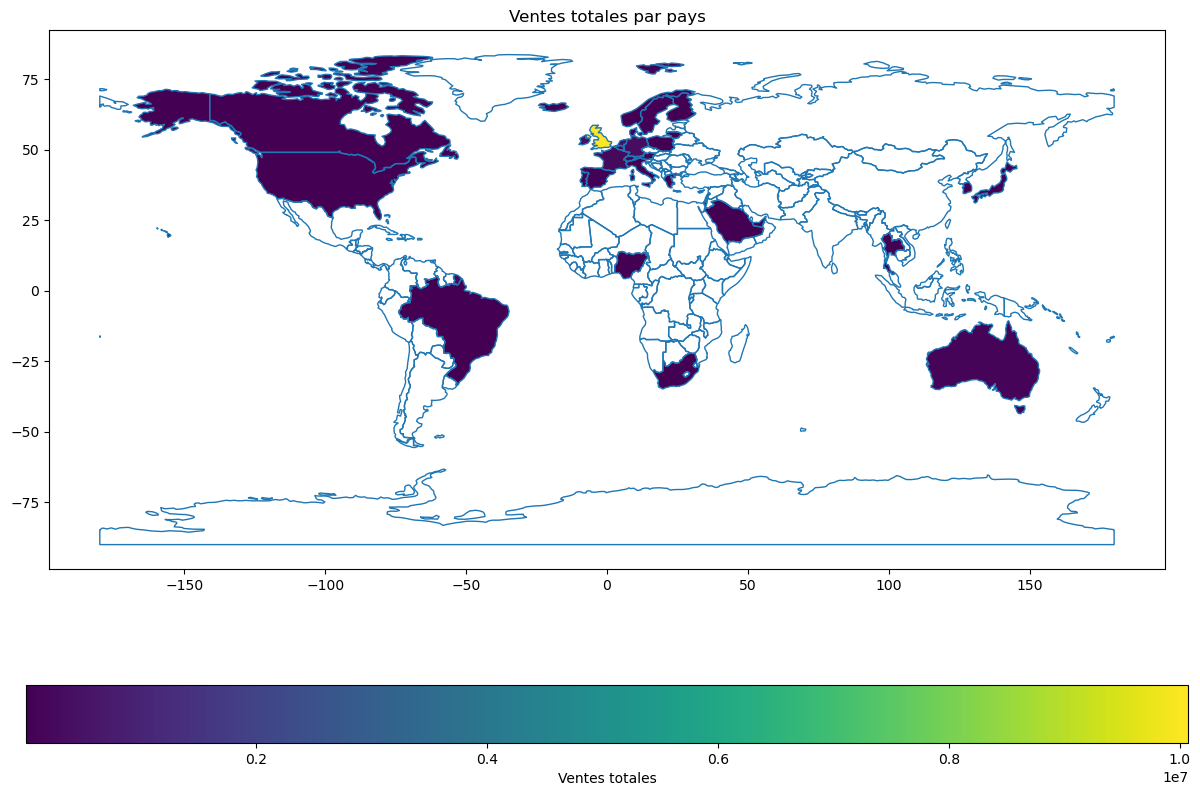

In [101]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Regrouper les données par pays et calculer les ventes totales
ventes_par_pays = df.groupby('Country').sum()['TotalSales']

# Charger un GeoDataFrame avec la géométrie de tous les pays du monde
monde = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Modifier les noms de pays pour correspondre aux noms dans le GeoDataFrame
ventes_par_pays = ventes_par_pays.rename(index={'United_Kingdom': 'United Kingdom', 'USA': 'United States of America', 'EIRE': 'Ireland', 'Channel_Islands': 'Fr.S.Antarctic Lands', 'United_Arab_Emirates': 'United Arab Emirates', 'RSA': 'South Africa', 'Korea': 'South Korea', 'Czech_Republic': 'Czech Rep.', 'Saudi_Arabia': 'Saudi Arabia'})

# Fusionner les données avec le GeoDataFrame
monde = monde.merge(ventes_par_pays, how='left', left_on='name', right_index=True)

# Tracer la carte
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
monde.boundary.plot(ax=ax, linewidth=1)
monde.plot(column='TotalSales', ax=ax, legend=True, cmap='viridis',
           legend_kwds={'label': 'Ventes totales', 'orientation': 'horizontal'})
plt.title('Ventes totales par pays')
plt.show()


In [102]:
import geopandas as gpd
import folium

# Group the data by country and calculate total sales
sales_by_country = df.groupby('Country').sum()['TotalSales']

# Load a GeoDataFrame with the geometry of all countries in the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Modifier les noms de pays pour correspondre aux noms dans le GeoDataFrame
sales_by_country = sales_by_country.rename(index={'United_Kingdom': 'United Kingdom', 'USA': 'United States of America', 'EIRE': 'Ireland', 'Channel_Islands': 'Fr.S.Antarctic Lands', 'United_Arab_Emirates': 'United Arab Emirates', 'RSA': 'South Africa', 'Korea': 'South Korea', 'Czech_Republic': 'Czech Rep.', 'Saudi_Arabia': 'Saudi Arabia'})

# Merge the data with the GeoDataFrame
world = world.merge(sales_by_country, how='left', left_on='name', right_index=True)

# Create a Folium map centered around the world
m = folium.Map(location=[0, 0], zoom_start=2)

# Define custom threshold scale
threshold_scale = [0, 50000, 100000, 150000, 200000, 250000, 300000, sales_by_country.max()]

# Add the GeoDataFrame to the map as a choropleth layer
folium.Choropleth(geo_data=world,
                  data=world,
                  columns=['name', 'TotalSales'],
                  key_on='feature.properties.name',
                  fill_color='YlOrRd',
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legend_name='Total Sales',
                  threshold_scale=threshold_scale).add_to(m)

# Display the interactive map
m


/tmp/ipykernel_8331/426444654.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_country = df.groupby('Country').sum()['TotalSales']
/tmp/ipykernel_8331/426444654.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [103]:
import geopandas as gpd
import folium
import numpy as np

# Group the data by country and calculate total sales
sales_by_country = df.groupby('Country').sum()['TotalSales']

# Apply logarithmic transformation to the data
sales_by_country_log = np.log10(sales_by_country)

# Load a GeoDataFrame with the geometry of all countries in the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Modifier les noms de pays pour correspondre aux noms dans le GeoDataFrame
sales_by_country_log = sales_by_country_log.rename(index={'United_Kingdom': 'United Kingdom', 'USA': 'United States of America', 'EIRE': 'Ireland', 'Channel_Islands': 'Fr.S.Antarctic Lands', 'United_Arab_Emirates': 'United Arab Emirates', 'RSA': 'South Africa', 'Korea': 'South Korea', 'Czech_Republic': 'Czechia', 'Saudi_Arabia': 'Saudi Arabia'})

# Merge the data with the GeoDataFrame
world = world.merge(sales_by_country_log, how='left', left_on='name', right_index=True)

# Create a Folium map centered around the world
m = folium.Map(location=[0, 0], zoom_start=2)

# Define custom threshold scale
threshold_scale = np.linspace(sales_by_country_log.min(), sales_by_country_log.max(), num=7)

# Add the GeoDataFrame to the map as a choropleth layer
folium.Choropleth(geo_data=world,
                  data=world,
                  columns=['name', 'TotalSales'],
                  key_on='feature.properties.name',
                  fill_color='YlOrRd',
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legend_name='Total Sales (Log Scale)',
                  threshold_scale=threshold_scale,
                  highlight=True).add_to(m)

# Display the interactive map
m


/tmp/ipykernel_8331/1363490130.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_country = df.groupby('Country').sum()['TotalSales']
/tmp/ipykernel_8331/1363490130.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [104]:
import geopandas as gpd
import folium
import numpy as np

# Regrouper les données par pays et calculer les ventes totales
sales_by_country = df.groupby('Country').sum()['TotalSales']

# Appliquer une transformation logarithmique aux données
sales_by_country_log = np.log10(sales_by_country)

# Charger un GeoDataFrame avec la géométrie de tous les pays du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Modifier les noms de pays pour correspondre aux noms dans le GeoDataFrame
sales_by_country_log = sales_by_country_log.rename(index={'United_Kingdom': 'United Kingdom', 'USA': 'United States of America', 'EIRE': 'Ireland', 'Channel_Islands': 'Fr.S.Antarctic Lands', 'United_Arab_Emirates': 'United Arab Emirates', 'RSA': 'South Africa', 'Korea': 'South Korea', 'Czech_Republic': 'Czechia', 'Saudi_Arabia': 'Saudi Arabia'})

# Fusionner les données avec le GeoDataFrame
world = world.merge(sales_by_country_log, how='left', left_on='name', right_index=True)

# Créer une carte Folium centrée sur le monde
m = folium.Map(location=[0, 0], zoom_start=2)

# Définir une échelle de seuils personnalisée
threshold_scale = np.linspace(sales_by_country_log.min(), sales_by_country_log.max(), num=7)

# Ajouter le GeoDataFrame à la carte en tant que couche choroplèthe
folium.Choropleth(geo_data=world,
                  data=world,
                  columns=['name', 'TotalSales'],
                  key_on='feature.properties.name',
                  fill_color='YlOrRd',
                  fill_opacity=0.8,
                  line_opacity=0.2,
                  legend_name='Total Sales (Log Scale)',
                  threshold_scale=threshold_scale,
                  highlight=True).add_to(m)

# Ajouter des popups à chaque pays
for idx, row in world.iterrows():
    if row['name'] in sales_by_country_log.index:
        total_sales = round(10**sales_by_country_log[row['name']], 2)
        popup_text = f"Country: {row['name']}<br>Total Sales: £{total_sales}"
        folium.GeoJson(row['geometry'], tooltip=popup_text).add_to(m)

# Afficher la carte interactive
m


/tmp/ipykernel_8331/286338538.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_country = df.groupby('Country').sum()['TotalSales']
/tmp/ipykernel_8331/286338538.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
